1) Загрузить из наборов данных Scikit-learn набор «Ирисы Фишера» (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

2) Ознакомиться с алгоритмами классификации (https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) и кластеризации (https://scikit-learn.org/stable/modules/clustering.html, https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html).
3) Провести кластеризацию набора алгоритмом k-ближайших соседей. Визуализировать результат.


In [2]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train[:, :2], y_train)

KNeighborsClassifier(n_neighbors=3)

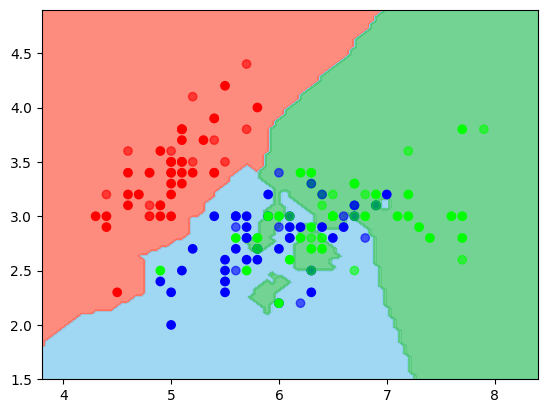

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

cm = ListedColormap(["#FE6F5E", "#89CFF0", "#50C878"])
cm_bright = ListedColormap(["#FF0000", "#0000FF", "#00FF00"])

DecisionBoundaryDisplay.from_estimator(
            neigh, X[:,:2], cmap=cm, alpha=0.8, eps=0.5
        )
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

4) Провести классификацию набора алгоритмом «случайный лес». Визуализировать результат.

In [5]:
from sklearn.ensemble import RandomForestClassifier

fc = RandomForestClassifier(n_estimators=100)
fc.fit(X_train[:, :2], y_train)

RandomForestClassifier()

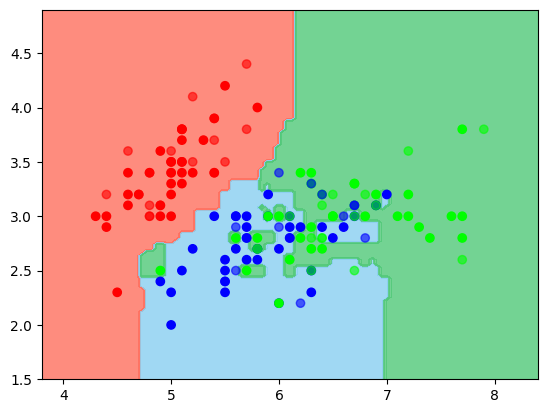

In [6]:
DecisionBoundaryDisplay.from_estimator(
            fc, X[:,:2], cmap=cm, alpha=0.8, eps=0.5
        )
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

5) Провести классификацию набора машинами опорных векторов (SVM). Визуализировать результат.

In [7]:
from sklearn.svm import SVC
svc = SVC(gamma=1)
svc.fit(X_train[:, :2], y_train)

SVC(gamma=1)

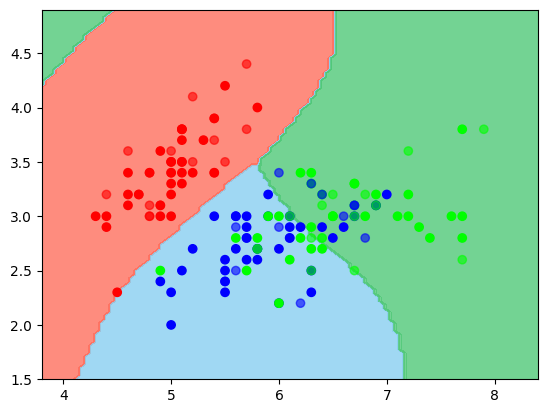

In [8]:
DecisionBoundaryDisplay.from_estimator(
            svc, X[:,:2], cmap=cm, alpha=0.8, eps=0.5
        )
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

6) Провести кластеризацию набора алгоритмом k-средних. Визуализировать результат.

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=3)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=3)

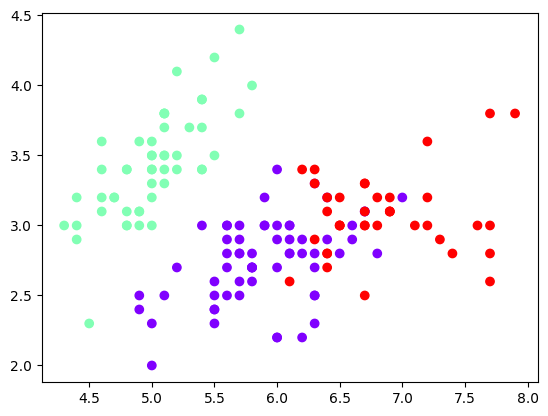

In [11]:
label = km.labels_
plt.scatter(X[:, 0], X[:, 1], c=label, cmap='rainbow')

7) Провести иерархическую кластеризацию методом Уорда. Визуализировать дендрограмму.

In [12]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(X, method="complete")

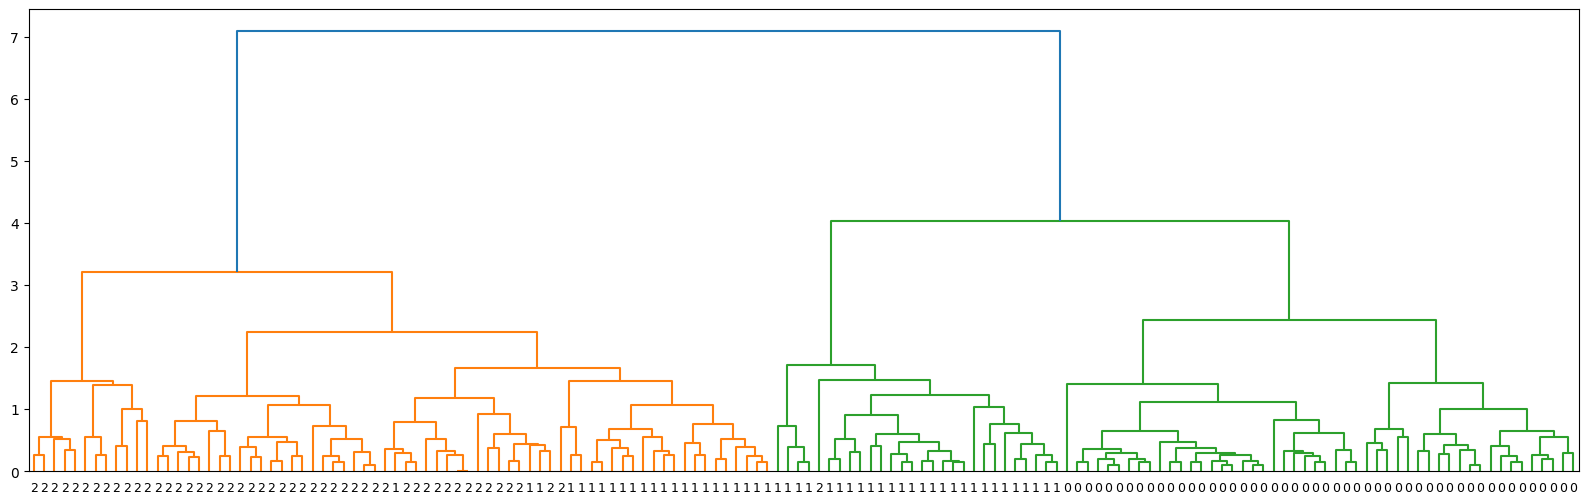

In [13]:
plt.figure(figsize=(20,6))
dendrogram = hierarchy.dendrogram(clusters, labels=y, orientation="top",leaf_font_size=9, leaf_rotation=360)

8) Провести спектральную кластеризацию. Визуализировать результат.

In [14]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters = 3)
labels = spectral.fit_predict(X)

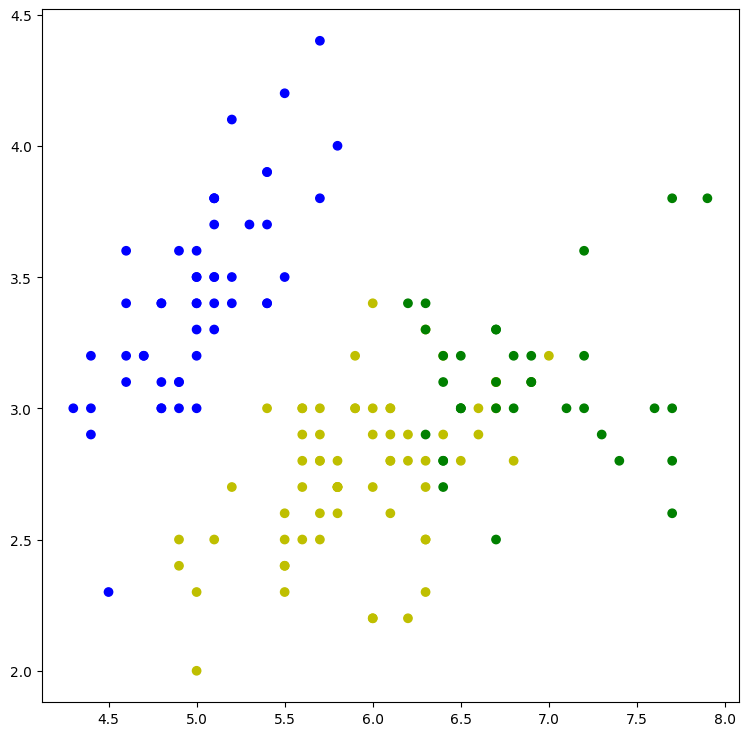

In [15]:
colours = {}
colours[0] = 'b'
colours[1] = 'y'
colours[2] = 'g'
cvec = [colours[label] for label in labels]

plt.figure(figsize =(9, 9))
plt.scatter(X[:,0], X[:,1], c=cvec)